<h3>라이브러리 호출</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import os
os.getcwd()

'C:\\Users\\ipl1\\Desktop\\IPL\\세미나(25하계)'

<h3>CSV 읽어오기</h3>

In [4]:
data = pd.read_csv('C:\\Users\\ipl1\\Desktop\\IPL\\세미나(25하계)\\data\\pubg-data\\train_V2.csv')

In [5]:
data.tail(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446957,2a4163ccbe0e3b,2689c981578849,eebc058a45ff13,0,1,100.00,0,0,0,32,...,1,0.0,0,0.000,0,0,363.70,2,0,0.4583
4446958,837349af7e8a35,58bc4104935623,2001300d4f5787,0,0,0.00,0,0,0,92,...,0,0.0,0,0.000,0,0,0.00,0,0,0.0000
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.68,0,0,0,89,...,0,0.0,0,0.000,0,0,40.25,1,0,0.0842
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.00,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.00,5,0,0.5464


<h3>데이터 전처리</h3>

In [6]:
df = data.select_dtypes(include=['number'])
df = df.dropna()

In [7]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446965 entries, 0 to 4446965
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  maxPlace         int64  
 13  numGroups        int64  
 14  rankPoints       int64  
 15  revives          int64  
 16  rideDistance     float64
 17  roadKills        int64  
 18  swimDistance     float64
 19  teamKills        int64  
 20  vehicleDestroys  int64  
 21  walkDistance     float64
 22  weaponsAcquired  int64  
 23  winPoints        int64  
 24  winPlacePerc     float64
dtypes: float64(6), int64(19)
memory usage: 882.1 MB


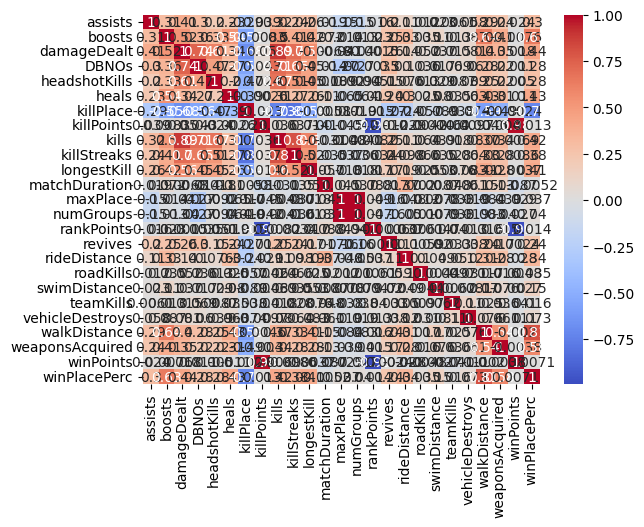

In [8]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [94]:
# killPoints, matchDuration, maxPlace, numGroups, rankPoints, roadKill, winPoints -> 제거
scaled_df = df.drop(columns=[
    'killPoints', 'matchDuration', 'maxPlace', 'numGroups',
    'rankPoints', 'roadKills', 'winPoints'
])

scaled_df.tail(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,revives,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
4446961,0,0,0.00,0,0,0,74,0,0,0.00,0,1292.0,0.000,0,0,1019.0,3,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0.00,0,0.0,0.000,0,0,81.7,6,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0.00,0,0.0,2.184,0,0,788.7,4,0.4815
4446964,0,4,180.40,1,1,2,11,2,1,98.50,2,0.0,0.000,0,0,2748.0,8,0.8000
4446965,0,2,268.00,0,0,1,18,2,1,78.25,0,1369.0,0.000,0,0,1244.0,5,0.5464


In [96]:
scaled_df.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,revives,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,0,0.0000,0.00,0,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,57,0,0,0.00,0,0.0045,11.04,0,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,47,0,0,0.00,0,0.0000,0.00,0,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,75,0,0,0.00,0,0.0000,0.00,0,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,45,1,1,58.53,0,0.0000,0.00,0,0,49.75,2,0.1875


In [10]:
scaled_df.shape

(4446965, 18)

array([[<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'boosts'}>,
        <Axes: title={'center': 'damageDealt'}>,
        <Axes: title={'center': 'DBNOs'}>],
       [<Axes: title={'center': 'headshotKills'}>,
        <Axes: title={'center': 'heals'}>,
        <Axes: title={'center': 'killPlace'}>,
        <Axes: title={'center': 'kills'}>],
       [<Axes: title={'center': 'killStreaks'}>,
        <Axes: title={'center': 'longestKill'}>,
        <Axes: title={'center': 'revives'}>,
        <Axes: title={'center': 'rideDistance'}>],
       [<Axes: title={'center': 'swimDistance'}>,
        <Axes: title={'center': 'teamKills'}>,
        <Axes: title={'center': 'vehicleDestroys'}>,
        <Axes: title={'center': 'walkDistance'}>],
       [<Axes: title={'center': 'weaponsAcquired'}>,
        <Axes: title={'center': 'winPlacePerc'}>, <Axes: >, <Axes: >]],
      dtype=object)

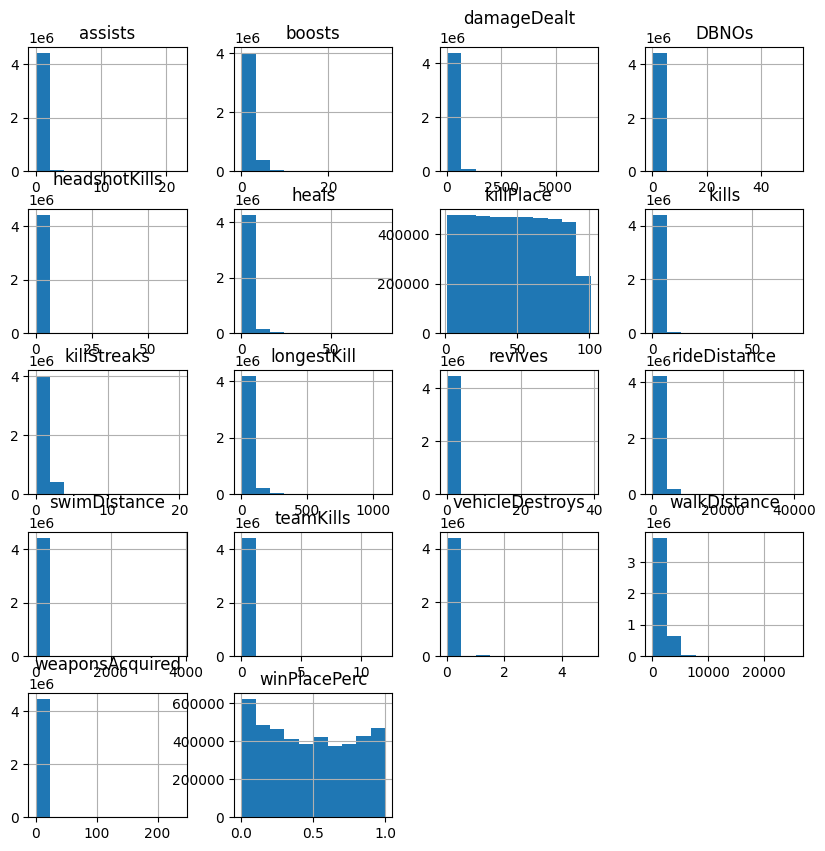

In [11]:
scaled_df.hist(figsize=(10,10))

<h4>데이터 분리</h4>

In [12]:
data = scaled_df.drop(columns=['winPlacePerc']).values
target = scaled_df['winPlacePerc'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

<h4>데이터 정규화</h4>

In [16]:
# 차원축소 전 데이터 정규화
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled_input = ss.transform(train_input)
test_scaled_input = ss.transform(test_input)

In [18]:
print(train_scaled_input)

[[-0.39733841 -0.06219917  0.55495586 ... -0.08546789  0.69233244
   0.95228551]
 [-0.39733841 -0.64516948 -0.01745696 ... -0.08546789  1.04721095
   2.58062953]
 [ 2.99964614  1.10374145  0.08135587 ... -0.08546789  1.87103606
   1.35937152]
 ...
 [-0.39733841 -0.64516948 -0.7646925  ... -0.08546789 -0.97559655
  -1.49023051]
 [-0.39733841 -0.64516948 -0.7646925  ... -0.08546789 -0.58818751
   0.95228551]
 [-0.39733841 -0.64516948 -0.47053428 ... -0.08546789  0.44053769
   0.54519951]]


<h4>차원축소</h4>

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit(train_scaled_input)
cumsum = np.cumsum(pca.explained_variance_ratio_)

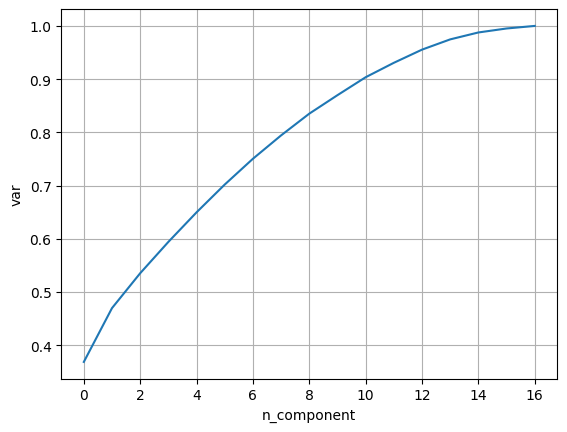

In [21]:
plt.plot(cumsum)
plt.grid(True)
plt.xlabel("n_component")
plt.ylabel("var")
plt.show()

In [22]:
pca = PCA(n_components=12)
train_reduce_input = pca.fit_transform(train_scaled_input)
test_reduce_input = pca.transform(test_scaled_input)

In [23]:
print(train_reduce_input)

[[-0.34129425  1.46056247 -0.26091542 ... -0.26481015  0.5859733
   0.26255782]
 [ 2.49374498  2.04634905 -0.26293548 ... -0.81706589  1.98577317
   2.05636309]
 [ 1.62385923  2.884635   -0.30161009 ...  0.94370742  0.35032142
  -0.94825982]
 ...
 [-2.60571629 -0.69132252  0.08709883 ...  0.35557536 -0.0998314
  -0.16128759]
 [-1.73515297  0.24675975 -0.16900859 ... -0.08442465  0.56964903
   0.58799496]
 [-1.00942665  1.52230147 -1.38797527 ... -0.34503296  0.40963261
   0.40399935]]


<h3>선형회귀</h3>

In [24]:
# 선형회귀
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(train_reduce_input, train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
train_score = lr.score(train_reduce_input, train_target)
print("훈련 정확도 (R²):", train_score)

test_score = lr.score(test_reduce_input, test_target)
print("테스트 정확도 (R²):", test_score)

훈련 정확도 (R²): 0.7396690599749487
테스트 정확도 (R²): 0.7401565365451745


In [27]:
from sklearn.model_selection import cross_validate

In [28]:
scores = cross_validate(lr, train_reduce_input, train_target)
print(np.mean(scores['test_score']))

0.739664688506989


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
test_pred = lr.predict(test_reduce_input)

In [31]:
lr_mae = mean_absolute_error(test_target, test_pred)
print("MAE : ", lr_mae)

MAE :  0.12178822360193876


In [32]:
rmse = np.sqrt(mean_squared_error(test_target, test_pred))
print("RMSE :", rmse)

RMSE : 0.15659068628534598


### LinearRegression 
훈련 정확도 (R²): 0.739<br/>테스트 정확도 (R²): 0.740<br/>-> 과소적합<br/><br/>
MAE : 0.12<br/>RMSE : 0.15<br/><br/>

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge = Ridge(alpha=1.0)
ridge.fit(train_reduce_input, train_target)
ridge_pred = ridge.predict(test_reduce_input)

train_r2 = ridge.score(train_reduce_input, train_target)
test_r2 = ridge.score(test_reduce_input, test_target)
mae = mean_absolute_error(test_target, ridge_pred)
rmse = np.sqrt(mean_squared_error(test_target, ridge_pred))

print("alpha == 1")
print("Train R²:", train_r2)
print("Test R² :", test_r2)
print("MAE:", mae)
print("RMSE:", rmse)

alpha == 1
Train R²: 0.7396690599749252
Test R² : 0.7401565368005447
MAE: 0.1217882271813013
RMSE: 0.15659068620839853


<h4>그리드서치 적용 랏쏘 모델</h4>

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = {'alpha' : [1.0, 0.5, 0.1, 0.01, 0.001]}

In [37]:
gs = GridSearchCV(estimator=ridge, param_grid=params, 
                  cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [38]:
gs.fit(train_reduce_input, train_target)

,estimator,Ridge()
,param_grid,"{'alpha': [1.0, 0.5, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [39]:
print(gs.best_params_)

{'alpha': 0.001}


In [40]:
ridge = Ridge(alpha=0.001)
ridge.fit(train_reduce_input, train_target)
ridge_pred = ridge.predict(test_reduce_input)

train_r2 = ridge.score(train_reduce_input, train_target)
test_r2 = ridge.score(test_reduce_input, test_target)     

mae = mean_absolute_error(test_target, ridge_pred)
rmse = np.sqrt(mean_squared_error(test_target, ridge_pred))

print("Train R²:", train_r2)
print("Test R² :", test_r2)
print("MAE:", mae)
print("RMSE:", rmse)

Train R²: 0.7396690599749487
Test R² : 0.7401565365454299
MAE: 0.12178822360551858
RMSE: 0.15659068628526904


### Ridge
훈련 정확도 (R²): 0.739<br/>테스트 정확도 (R²): 0.740<br/>-> 과소적합<br/><br/>
MAE : 0.12<br/>RMSE : 0.15<br/><br/>

<h3>Extra-Tree</h3>

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
et = ExtraTreesRegressor(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_reduce_input, train_target, cv=3,
                       return_train_score=True, n_jobs=-1)

In [49]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9986678253877067 0.8647559772227665


In [54]:
param_grid = {
    'n_estimators': [30, 50],        
    'max_depth': [8, 10, None],       
    'max_leaf_nodes': [None, 30, 50]  
}

In [55]:
et = ExtraTreesRegressor(n_jobs=-1, random_state=42)

grid_search = GridSearchCV(
    estimator=et,
    param_grid=param_grid,
    cv=3,               
    n_jobs=-1,          
    scoring='neg_mean_absolute_error',        
    verbose=1          
)

In [56]:
grid_search.fit(train_reduce_input, train_target)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


,estimator,ExtraTreesReg...ndom_state=42)
,param_grid,"{'max_depth': [8, 10, ...], 'max_leaf_nodes': [None, 30, ...], 'n_estimators': [30, 50]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [60]:
print(grid_search.best_params_)

{'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 50}


In [63]:
extra_model = grid_search.best_estimator_

train_pred = extra_model.predict(train_reduce_input)
test_pred = extra_model.predict(test_reduce_input)

r2_train = r2_score(train_target, train_pred)
r2_test = r2_score(test_target, test_pred)

# 4. MAE
mae_train = mean_absolute_error(train_target, train_pred)
mae_test = mean_absolute_error(test_target, test_pred)

# 5. RMSE
rmse_train = np.sqrt(mean_squared_error(train_target, train_pred))
rmse_test = np.sqrt(mean_squared_error(test_target, test_pred))

# 6. 결과 출력
print(f"▶ [TRAIN] R²: {r2_train:.4f} | MAE: {mae_train:.4f} | RMSE: {rmse_train:.4f}")
print(f"▶ [TEST ] R²: {r2_test:.4f} | MAE: {mae_test:.4f} | RMSE: {rmse_test:.4f}")

▶ [TRAIN] R²: 0.9984 | MAE: 0.0018 | RMSE: 0.0123
▶ [TEST ] R²: 0.8644 | MAE: 0.0823 | RMSE: 0.1131


In [64]:
et.fit(train_reduce_input, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [66]:
et_pred = et.predict(test_reduce_input)

et_train_r2 = et.score(train_reduce_input, train_target)
et_test_r2 = et.score(test_reduce_input, test_target)

et_mae = mean_absolute_error(test_target, et_pred)
et_rmse = np.sqrt(mean_squared_error(test_target, et_pred))

In [67]:
print("Train R²:", et_train_r2)
print("Test R² :", et_test_r2)
print("MAE:", et_mae)
print("RMSE:", et_rmse)

Train R²: 0.9983917148203242
Test R² : 0.8657787254414296
MAE: 0.08192700281588333
RMSE: 0.11254357551576956


### ExtraTree
훈련 정확도 (R²): 0.998<br/>테스트 정확도 (R²): 0.865<br/>-> 과대적합<br/><br/>
MAE : 0.08<br/>RMSE : 0.11<br/><br/>

<h3>XGBoost</h3>

In [73]:
from xgboost import XGBRegressor

In [77]:
xgb = XGBRegressor(
    tree_method='hist',   
    device='cuda',          
    random_state=42,
    n_jobs=-1
)

In [80]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [81]:
grid_search.fit(train_reduce_input, train_target)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [6, 8, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [82]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [83]:
xgb_param_grid = {
    'n_estimators': [300, 400, 500],        
    'max_depth': [10, 12, 14],              
    'learning_rate': [0.05, 0.1, 0.15],     
}

In [84]:
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [85]:
xgb_grid_search.fit(train_reduce_input, train_target)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [10, 12, ...], 'n_estimators': [300, 400, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [86]:
print(xgb_grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 500}


<h4>그리드서치 파라미터 적용 xgb</h4>

In [87]:
best_xgb = XGBRegressor(
    learning_rate=0.05,
    max_depth=12,
    n_estimators=500,
    tree_method='hist',
    device='cuda',
    random_state=42,
    n_jobs=-1
)

In [89]:
best_xgb.fit(train_reduce_input, train_target)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [91]:
xgb_pred = best_xgb.predict(test_reduce_input, validate_features=False)

xgb_train_r2 = best_xgb.score(train_reduce_input, train_target)
xgb_test_r2 = best_xgb.score(test_reduce_input, test_target)

xgb_mae = mean_absolute_error(test_target, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(test_target, xgb_pred))

In [92]:
print("Train R²:", xgb_train_r2)
print("Test R² :", xgb_test_r2)
print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)

Train R²: 0.9099117849627046
Test R² : 0.8800711488872814
MAE: 0.07646460221490542
RMSE: 0.10638291002895232


### XGBoost
훈련 정확도 (R²): 0.909<br/>테스트 정확도 (R²): 0.88<br/><br/><br/>
MAE : 0.07<br/>RMSE : 0.10<br/><br/>

<h3>LGBM</h3>

In [99]:
import lightgbm as lgb

In [100]:
lgbm = lgb.LGBMRegressor(objective='regression', metric='mae', random_state=42)

lgbm_param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.1, 0.05],
    'max_depth': [5, 10],
    'num_leaves': [31, 63],
}

lgbm_grid = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [101]:
lgbm_grid.fit(train_reduce_input, train_target)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 12
[LightGBM] [Info] Start training from score 0.472937


,estimator,LGBMRegressor...ndom_state=42)
,param_grid,"{'learning_rate': [0.1, 0.05], 'max_depth': [5, 10], 'n_estimators': [100, 300], 'num_leaves': [31, 63]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [103]:
print(lgbm_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 63}


In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [111]:
lgbm_param_dist2 = {
    'n_estimators': randint(300, 800),
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': randint(10, 16),
    'num_leaves': randint(64, 130)
}

lgbm_random = RandomizedSearchCV(
    lgbm, param_distributions=lgbm_param_dist2,
    n_iter=20, scoring='neg_mean_absolute_error',
    cv=5, random_state=42, n_jobs=-1
)

In [112]:
lgbm_random.fit(train_reduce_input, train_target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 12
[LightGBM] [Info] Start training from score 0.472937


,estimator,LGBMRegressor...ndom_state=42)
,param_distributions,"{'learning_rate': [0.1, 0.05, ...], 'max_depth': <scipy.stats....00208DA012800>, 'n_estimators': <scipy.stats....00208DDC260E0>, 'num_leaves': <scipy.stats....00209E1B0A800>}"
,n_iter,20
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [114]:
print(lgbm_random.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 759, 'num_leaves': 121}


In [115]:
best_lgbm = lgb.LGBMRegressor(
    learning_rate=0.1,
    max_depth=10,
    n_estimators=759,
    num_leaves=121,
    objective='regression',
    random_state=42
)

In [116]:
# 모델 학습
best_lgbm.fit(train_reduce_input, train_target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 12
[LightGBM] [Info] Start training from score 0.472937


,boosting_type,'gbdt'
,num_leaves,121
,max_depth,10
,learning_rate,0.1
,n_estimators,759
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [119]:
best_lgbm_pred = best_lgbm.predict(test_reduce_input)

best_lgbm_train_r2 = best_lgbm.score(train_reduce_input, train_target)
best_lgbm_test_r2 = best_lgbm.score(test_reduce_input, test_target)

best_lgbm_mae = mean_absolute_error(test_target, best_lgbm_pred)
best_lgbm_rmse = np.sqrt(mean_squared_error(test_target, best_lgbm_pred))

C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [121]:
print("Train R²:", best_lgbm_train_r2)
print("Test R² :", best_lgbm_test_r2)
print("MAE:", best_lgbm_mae)
print("RMSE:", best_lgbm_rmse)

Train R²: 0.8834501908359822
Test R² : 0.876895792219845
MAE: 0.07761806037871263
RMSE: 0.10778205957732423


### LGBM
훈련 정확도 (R²): 0.883<br/>테스트 정확도 (R²): 0.876<br/><br/><br/>
MAE : 0.07<br/>RMSE : 0.10<br/><br/>

In [104]:
lgbm = lgb.LGBMRegressor(
    objective='regression',
    metric='mae',
    learning_rate=0.1,
    max_depth=10,
    n_estimators=300,
    num_leaves=63,
    random_state=42
)

In [105]:
lgbm.fit(train_reduce_input, train_target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 12
[LightGBM] [Info] Start training from score 0.472937


,boosting_type,'gbdt'
,num_leaves,63
,max_depth,10
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [108]:
lgbm_pred = lgbm.predict(test_reduce_input)

lgbm_train_r2 = lgbm.score(train_reduce_input, train_target)
lgbm_test_r2 = lgbm.score(test_reduce_input, test_target)

lgbm_mae = mean_absolute_error(test_target, lgbm_pred)
lgbm_rmse = np.sqrt(mean_squared_error(test_target, lgbm_pred))

C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [109]:
print("Train R²:", lgbm_train_r2)
print("Test R² :", lgbm_test_r2)
print("MAE:", lgbm_mae)
print("RMSE:", lgbm_rmse)

Train R²: 0.8713890385941205
Test R² : 0.8696594460596163
MAE: 0.0800109866725698
RMSE: 0.11090466402831707


==

In [122]:
params2 = {
        "objective" : "regression", 
        "metric" : "mae", 
        "num_leaves" : 150, 
        "learning_rate" : 0.03, 
        "bagging_fraction" : 0.9,
        "bagging_seed" : 0, 
        "num_threads" : 4,
        "colsample_bytree" : 0.5,
        'min_data_in_leaf':1900, 
        'lambda_l2':9
}

In [123]:
reg2 = lgb.LGBMRegressor(**params2, n_estimators=2000)

In [125]:
reg2.fit(test_reduce_input, test_target)

[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 889393, number of used features: 12
[LightGBM] [Info] Start 

,boosting_type,'gbdt'
,num_leaves,150
,max_depth,-1
,learning_rate,0.03
,n_estimators,2000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [131]:
prediction = reg2.predict(test_reduce_input)

reg2_train_r2 = reg2.score(train_reduce_input, train_target)
reg2_test_r2 = reg2.score(test_reduce_input, test_target)

reg2_mae = mean_absolute_error(test_target, prediction)
reg2_rmse = np.sqrt(mean_squared_error(test_target, prediction))

C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Users\ipl1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [132]:
print("Train R²:", reg2_train_r2)
print("Test R² :", reg2_test_r2)
print("MAE:", reg2_mae)
print("RMSE:", reg2_rmse)

Train R²: 0.8735399131537509
Test R² : 0.88448564204959
MAE: 0.07533162514010915
RMSE: 0.10440661452399388


<h4><b>?왜 낮음? ? ? ㄴㅇㄹdfsdfsdnlfksndfiolsdofjsdlfjls</b></h4>